In [10]:
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Stations = Base.classes.station

session = Session(engine)

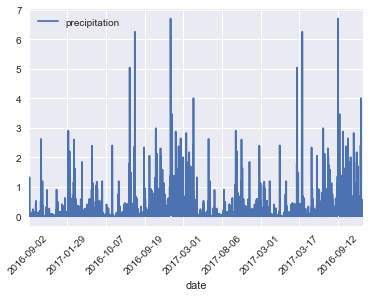

In [11]:
precipitationlist = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-09-01').all()
precipitation = pd.DataFrame(precipitationlist)
precipitation = precipitation.set_index('date')
precipitation = precipitation.rename(columns={'prcp': 'precipitation'})
seaborn.set()
precipitation.plot(rot=45)
plt.show()

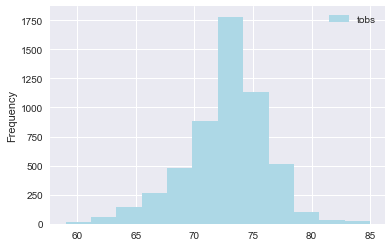

In [13]:
session.query(Stations.station).distinct().count()


session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).all()
x = session.query(Measurement.tobs).filter_by(station='USC00513117').all()
df = pd.DataFrame(x, columns=['tobs'])

df.plot(kind="hist", bins=12, color='lightblue')
plt.show()

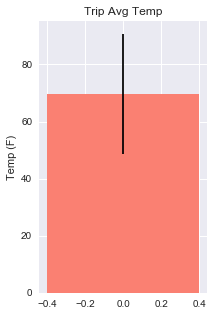

In [14]:
def calc_temps(start_date, end_date):
    s_date = datetime.strptime(start_date, '%Y-%m-%d') - timedelta(days=365.24)
    e_date = datetime.strptime(end_date, '%Y-%m-%d') - timedelta(days=365.24)
    
    result = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs))\
    .filter(s_date < Measurement.date, Measurement.date < e_date).all()
    
    return result[0]

result = calc_temps("2018-01-01","2018-02-01")

min_tobs = result[0]
avg_tobs = result[1]
max_tobs = result[2]

plt.figure(figsize=(3,5))
plt.bar(0, avg_tobs, yerr=max_tobs-min_tobs, color="salmon")
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()